In [26]:

import warnings
warnings.filterwarnings("ignore")
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # graphs
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # scaling ( in numerical :  normalization )
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import numpy as np # arrays and matrices (mathmetics)
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
#Calculating Precision Score : (Specificity) #(TP / (TP + FP))
#Calculating Recall Score : (Sensitivity) (TP / (TP + FN))   
from sklearn.metrics import roc_curve# compare between recall TP (sensitivty) and Specificity TN
from sklearn.metrics import auc 
from sklearn.neural_network import MLPClassifier #loss curve 
import keras # combo large 
from matplotlib import pyplot # graphs
from sklearn import datasets # path 
import seaborn as sns # confusion plot 

In [27]:
dataset = pd.read_csv ("BankChurners.csv")
#dataset.columns.values[-1] = 'classification'
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier,classification
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,True
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,True
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,True
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,True
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,True


In [41]:
#cleaning
#if any coloumn has null value
dataset.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Naive_Bayes_Classifier      0
classification              0
dtype: int64

In [42]:
#if we have duplicated rows (boolean)
dataset.duplicated().any()

False

In [30]:
#one hot/label encoding
#categorial(object) to numerical
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 2998 non-null   int64  
 1   Attrition_Flag            2998 non-null   object 
 2   Customer_Age              2998 non-null   int64  
 3   Gender                    2998 non-null   object 
 4   Dependent_count           2998 non-null   int64  
 5   Education_Level           2998 non-null   object 
 6   Marital_Status            2998 non-null   object 
 7   Income_Category           2998 non-null   object 
 8   Card_Category             2998 non-null   object 
 9   Months_on_book            2998 non-null   int64  
 10  Total_Relationship_Count  2998 non-null   int64  
 11  Months_Inactive_12_mon    2998 non-null   int64  
 12  Contacts_Count_12_mon     2998 non-null   int64  
 13  Credit_Limit              2998 non-null   float64
 14  Total_Re

In [31]:
#separate them in two dataframes
numerical = dataset.select_dtypes(exclude=['object','bool'])
categorical = dataset.select_dtypes (include=['object','bool'])

numerical.head()

categorical.head()
# fit --> mean and standard dev
# transform apply them
le= preprocessing.LabelEncoder()
label_encoded_categorical = categorical.apply(le.fit_transform)
label_encoded_categorical.head()
#The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling. The transform(data) method is used to perform scaling using mean and std dev calculated using the . fit() method
#combine them again by concatenation func
df=pd.concat([numerical, label_encoded_categorical], axis=1) # axis = 1 --> coloums concatination
df.head()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,classification
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,1.625,0.061,0.000093,1,1,3,1,2,0,1
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,3.714,0.105,0.000057,1,0,2,2,4,0,1
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,2.333,0.000,0.000021,1,1,2,1,3,0,1
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,2.333,0.760,0.000134,1,0,3,3,4,0,1
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,2.500,0.000,0.000022,1,1,5,1,2,0,1


In [32]:
#feature selection
x= df.drop(['classification'], axis=1)
y= df.classification


X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=0.20, shuffle = True, random_state =2)


# shuffle --> better acuracy

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #  m4 fahmnha wlahy dont ask feha 😁❤️
#The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance

X_train
X_test


array([[-0.7312455 ,  1.67200087, -1.61777923, ...,  0.96569194,
         1.56984074, -0.21151394],
       [-0.62500133,  1.15845499, -0.08197773, ..., -0.5216101 ,
        -1.78830207, -0.21151394],
       [ 2.14566641, -2.02552945, -1.61777923, ...,  0.96569194,
         0.89821218, -0.21151394],
       ...,
       [-0.79791761, -0.89572852,  0.68592302, ...,  0.96569194,
        -0.44504495, -0.21151394],
       [-0.68291196,  1.77471004, -0.08197773, ..., -0.5216101 ,
        -1.11667351, -0.21151394],
       [-0.73234573,  1.77471004, -0.84987848, ..., -0.5216101 ,
         0.89821218, -0.21151394]])

In [43]:
LogisticRegressionModel = LogisticRegression(penalty='l1',dual=False,tol=0.0001,C=0.2,fit_intercept=True,intercept_scaling=1,
                               class_weight=None,random_state=None,solver='saga',
                               verbose=0,warm_start=False, n_jobs=None
)
LogisticRegressionModel.fit(X_train, y_train) # training

y_pred = LogisticRegressionModel.predict(X_test) # validate 
AccScore = accuracy_score(y_test, y_pred) 
print('Accuracy Score is : ', AccScore)


Accuracy Score is :  0.9733333333333334


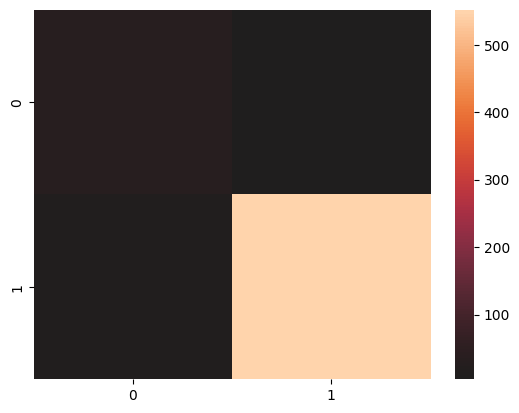

In [45]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, center =True)
plt.show()


In [55]:
F1=f1_score(y_test, y_pred)
print('F1 Score is : ', F1)

#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
#recall_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

RecallScore = recall_score(y_test, y_pred) #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
#precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary',sample_weight=None)

PrecisionScore = precision_score(y_test, y_pred) #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

AccScore = accuracy_score(y_test, y_pred)
print('Accuracy Score is : ', AccScore)


F1 Score is :  0.9857142857142858
Recall Score is :  0.9787234042553191
Precision Score is :  0.9928057553956835
Accuracy Score is :  0.9733333333333334


[0.6058393070152108, 0.41843527560479415, 0.29932959538400583, 0.22653094248269456, 0.1814326059093102, 0.15217125991930933, 0.13245919849198676, 0.11836303186298001, 0.10801957488662314, 0.10026906796094193, 0.094175316921297, 0.08912436629984707, 0.08508585479455362, 0.08173059709136225, 0.07881569442835704, 0.07647573856054743, 0.07405529089527854, 0.07213238778650291]


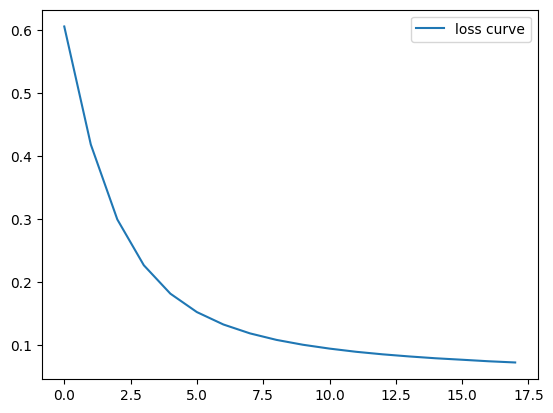

In [57]:

LogisticRegressionModel = MLPClassifier(
              activation='relu',
              solver='adam',
              learning_rate='adaptive',
              early_stopping=True)
LogisticRegressionModel.fit(X_train,y_train)
loss_values = LogisticRegressionModel.loss_curve_
print (loss_values)
plt.plot(loss_values,label='loss curve')
plt.legend() 
plt.show()
# kolo test 2ela l fit 


AUC Value  :  0.9338061465721039


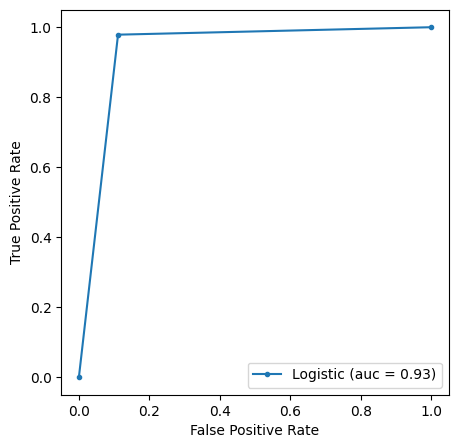

In [62]:
fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue, tprValue)
print('AUC Value  : ', AUCValue)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fprValue,tprValue, marker='.', label='Logistic (auc = %0.2f)' % AUCValue)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()